This assignment is finished collaboratively by Steve Wen #260948939 and Chloe (Chuqiao) Si # 260


In [64]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
random.seed(2002)

In [65]:
class Bandits:

    def __init__(self, k, true_values):
        """
        The initialization function of the Bandit. 
        k -- the number of the Bandits
        bandits -- the true values of each bandit
        estimate -- the estimate of the bandit values
        n -- number of times the arm has been chosen
        """
        self.k = k
        self.bandits = np.array(true_values)
        self.estimate = np.zeros(k)
        self.n = np.zeros(k)
    
    def sample(self, idx):
        return np.random.binomial(n = 1, p = self.bandits[idx])

    def update(self, idx, reward, alpha):
        self.n[idx] += 1
        self.estimate[idx] = self.estimate[idx] + alpha* (reward - self.estimate[idx])
    
    def updateAvg(self, idx, reward):
        self.n[idx] += 1
        self.estimate[idx] = self.estimate[idx] + 1/self.n[idx] * (reward - self.estimate[idx])

    # Epsilon greedy
    def eps_greedy(self, epsilon, alpha=None, tSteps=1000, new_bandit=None):
        reward_list=[]
        optimal_action=[]
        regret_list=[]
        for t in range(tSteps):
            if t==500 and new_bandit is not None:
              self.bandits=new_bandit
            if np.random.binomial(1, epsilon)==1 :
                idx = np.random.randint(low = 0, high = self.k) 
            # In case of multiple bandits have the maximum value, random select one from them
            else:
                max= np.max(self.estimate)
                indices= [i for i in range(self.k) if self.estimate[i]== max]
                idx= random.choice(indices)

            reward = self.sample(idx)
            reward_list.append(reward)
            regret_list.append(self.bandits[np.argmax(self.bandits)]-self.bandits[idx])
            if idx == np.argmax(self.bandits):
              optimal_action.append(1)
            else:
              optimal_action.append(0)

            if alpha is not None:
              self.update(idx, reward, alpha)
            else:
              self.updateAvg(idx, reward)
        return reward_list, optimal_action, regret_list

    # UCB  
    def ucb(self, c, alpha=None, tSteps=1000, new_bandit=None):
        reward_list=[]
        optimal_action=[]
        regret_list=[]
        for t in range(tSteps):
          if t==500 and new_bandit is not None:
              self.bandits=new_bandit
          curEstimate = np.zeros(self.k)
          for i in range(self.k):
            if self.n[i]!=0 :
              curEstimate[i] = self.estimate[i] + (c*math.sqrt(math.log(t)/self.n[i]))
            else:
              curEstimate[i] = math.inf
          # In case of multiple bandits have the maximum value, random select one from them
          max= np.max(curEstimate)
          indices= [i for i in range(self.k) if curEstimate[i]== max]
          idx= random.choice(indices)
          reward = self.sample(idx) 
          reward_list.append(reward)
          regret_list.append(self.bandits[np.argmax(self.bandits)]-self.bandits[idx])
          if idx == np.argmax(self.bandits):
              optimal_action.append(1)
          else:
              optimal_action.append(0)

          if alpha is not None:
              self.update(idx, reward, alpha)
          else:
              self.updateAvg(idx, reward)
        
        return reward_list, optimal_action, regret_list

    # Thompson Sampling 
    def thompson(self, tSteps=1000, new_bandit=None):
        reward_list=[]
        optimal_action=[]
        regret_list=[]
        S= np.zeros(self.k)
        F= np.zeros(self.k)
        for t in range(tSteps):
          if t==500 and new_bandit is not None:
              self.bandits= new_bandit
          theta= [np.random.beta(S[i]+ 1, F[i]+ 1) for i in range(self.k)]
          #In case of multiple bandits have the maximum value, random select one from them
          max= np.max(theta)
          indices= [i for i in range(self.k) if theta[i]== max]
          idx= random.choice(indices)
          reward = self.sample(idx)
          reward_list.append(reward)
          regret_list.append(self.bandits[np.argmax(self.bandits)]-self.bandits[idx])
          if idx == np.argmax(self.bandits):
              optimal_action.append(1)
          else:
              optimal_action.append(0)

          if reward== 1:
            S[idx]+= 1
          else:
            F[idx]+= 1
        return reward_list, optimal_action, regret_list
          

In [66]:
# Q1
np.random.seed(2002)
delta = 0.1
qval = [0.5, 0.5-delta, 0.5-2*delta]
b = Bandits(3, qval)
b_sample = np.zeros((3,51))
counter=[0,0,0]
for i in range(3):
  for j in range(1,51):
    b_sample[i,j]=b.sample(i)
    if b_sample[i,j] == 1:
      counter[i] += 1
Qval=[c/50 for c in counter]

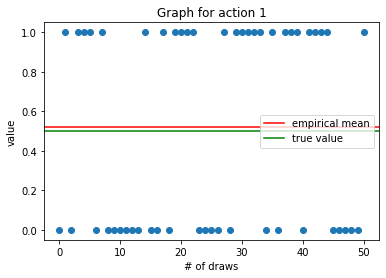

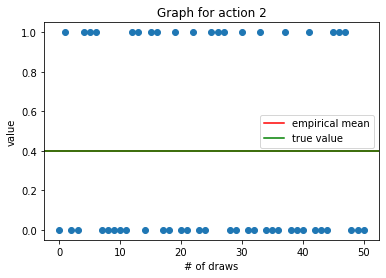

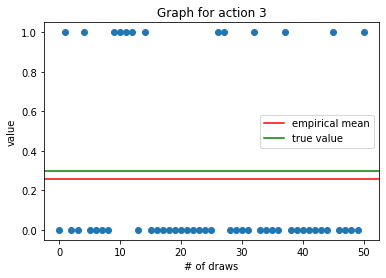

In [67]:
# plot Q1
x = range(51)
for i in range(3):
  plt.scatter(x,b_sample[i])
  plt.axhline(y=Qval[i], color = 'r', linestyle = '-', label= 'empirical mean')
  plt.axhline(y=qval[i], color = 'g', linestyle = '-', label= 'true value')
  plt.xlabel("# of draws")
  plt.ylabel("value")
  plt.title("Graph for action %d" %(i+1))
  plt.legend()
  plt.show()
# red line is the empirical mean and green line is the true value

In [68]:
# Q2
# calculate Qval for updateAvg
delta = 0.1
qval = [0.5, 0.5-delta, 0.5-2*delta]
np.random.seed(2002)
b = Bandits(3, qval)
Q_updateAvg = np.zeros((3,51))
for i in range(3):
  for j in range(1, 51):
    b.updateAvg(i,b.sample(i))
    Q_updateAvg[i,j] = b.estimate[i]

# calculate Qval for update with alpha = 0.01
np.random.seed(2002)
b = Bandits(3, qval)
Q_update1 = np.zeros((3,51))
for i in range(3):
  for j in range(1, 51):
    b.update(i,b.sample(i),0.01)
    Q_update1[i,j] = b.estimate[i]

# calculate Qval for update with alpha = 0.1
np.random.seed(2002)
b = Bandits(3, qval)
Q_update2 = np.zeros((3,51))
for i in range(3):
  for j in range(1, 51):
    b.update(i,b.sample(i),0.1)
    Q_update2[i,j] = b.estimate[i]



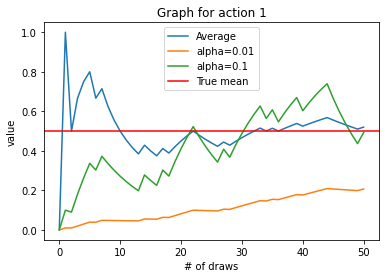

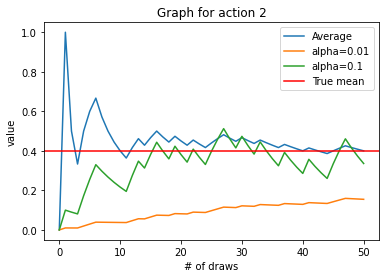

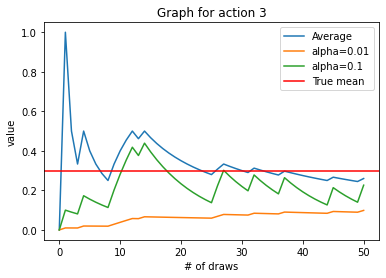

In [69]:
# plot Q2
x = range(51)
for i in range(3):
  plt.plot(x,Q_updateAvg[i], label= "Average")  # blue
  plt.plot(x,Q_update1[i], label= "alpha=0.01")    # yellow alpha=0.01
  plt.plot(x,Q_update2[i], label= "alpha=0.1")    # green alpha=0.1
  plt.axhline(y=qval[i], color = 'r', linestyle = '-', label= "True mean")
  plt.xlabel("# of draws")
  plt.ylabel("value")
  plt.legend()
  plt.title("Graph for action %d" %(i+1))
  plt.show()

In [70]:
# Q3
# calculate Qval for updateAvg
delta = 0.1
qval = [0.5, 0.5-delta, 0.5-2*delta]
np.random.seed(2002)

Q_updateAvg = np.zeros((100,3,101))
for k in range(100):
  b = Bandits(3, qval)
  for i in range(3):
    for j in range(1, 101):
      b.updateAvg(i,b.sample(i))
      Q_updateAvg[k,i,j] = b.estimate[i]

Q_updateAvg_mean = np.mean(Q_updateAvg, axis=0)
Q_updateAvg_sd = np.std(Q_updateAvg, axis=0)
Q_updateAvg_se = Q_updateAvg_sd/math.sqrt(100)

# calculate Qval for update with alpha = 0.01
np.random.seed(2002)
b = Bandits(3, qval)
Q_update1 = np.zeros((100,3,101))
for k in range(100):
  b = Bandits(3, qval)
  for i in range(3):
    for j in range(1, 101):
      b.update(i,b.sample(i),0.01)
      Q_update1[k,i,j] = b.estimate[i]

Q_update1_mean = np.mean(Q_update1, axis=0)
Q_update1_sd = np.std(Q_update1, axis=0)
Q_update1_se = Q_update1_sd/math.sqrt(100)

# calculate Qval for update with alpha = 0.1
np.random.seed(2002)
Q_update2 = np.zeros((100,3,101))
for k in range(100):
  b = Bandits(3, qval)
  for i in range(3):
    for j in range(1, 101):
      b.update(i,b.sample(i),0.1)
      Q_update2[k,i,j] = b.estimate[i]

Q_update2_mean = np.mean(Q_update2, axis=0)
Q_update2_sd = np.std(Q_update2, axis=0)
Q_update2_se = Q_update2_sd/math.sqrt(100)

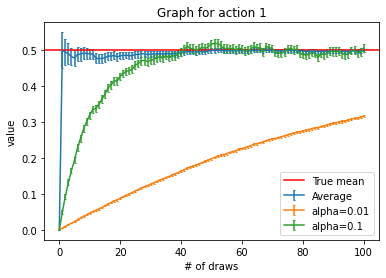

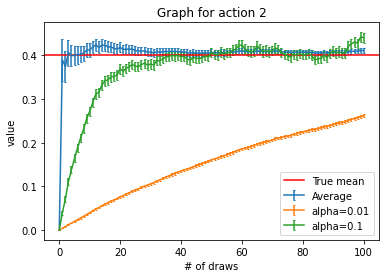

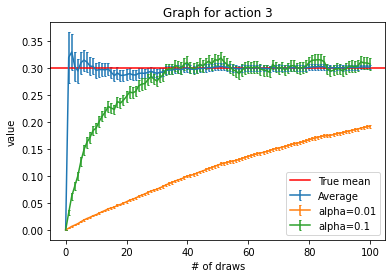

In [71]:
# plot Q3
x = range(101)
for i in range(3):
  plt.errorbar(x,Q_updateAvg_mean[i],yerr=Q_updateAvg_se[i],capsize=1, label= "Average")  
  plt.errorbar(x,Q_update1_mean[i],yerr=Q_update1_se[i],capsize=1, label= "alpha=0.01")    
  plt.errorbar(x,Q_update2_mean[i],yerr=Q_update2_se[i],capsize=1, label= "alpha=0.1")    
  plt.axhline(y=qval[i], color = 'r', linestyle = '-', label= "True mean")
  plt.xlabel("# of draws")
  plt.ylabel("value")
  plt.legend()
  plt.title("Graph for action %d" %(i+1))
  plt.show()

1. Form the graphs we can see that different averaging method and various 
learning rate show similar behaviors across the 3 bandits. By assuming the initial value is 0, the averaging method approches the true value alomost immediately and the error reduces over time. For the remaining two methods, we can find that when alpha=0.1, the estimate approches the true value pretty quick but the error slightly increases and then keeps constant. When alpha=0.01, the learning rate is too small for the agent to approch the true value in 100 draws but the error is also very small as we desired. Afterall, a big alpha would reach around the estimate quickly but tends to overshoot. A small alpha will learn more slowly but with a smaller error. 
2. If we are limited to 100 draws, 0.1 is a better choice since at least we are close to the true value but if we can have more draws, 0.01 will be better since they eventually will be close enough to the true value but this one has significantly lower errors. However, averaging seems to be the best among them since it not only has fast approching rate and the error is also reducing over time, which combines the advantages of both alphas.
3. For further experiments, if we only have 100 draws, we will examine alpha between 0.05 and 0.1 to make alpha balance between fast learning and small error. But if we have more draws, we will examine for alpha between 0.01 and 0.05 to see if we could find better solutions there. 

In [72]:
# Q4 Epsilon 
delta = 0.1
qval = [0.5, 0.5-delta, 0.5-2*delta]
epsilon = [0, 1/8, 1/4, 1/2, 1]
avg_r = np.zeros((100,5,1000))
opt_total = np.zeros((100,5,1000))
regret_lt = np.zeros((100,5,1000))
for i in range(5):
  np.random.seed(2002)
  for j in range(100):
    b = Bandits(3, qval)
    r, opt, lt = b.eps_greedy(epsilon[i])
    avg_r[j,i] = np.array(r)
    opt_total[j,i] = np.array(opt)
    regret_lt[j,i] = np.array(lt)


avg_r_mean = np.mean(avg_r, axis=0)
avg_r_sd = np.std(avg_r, axis=0)
avg_r_se = avg_r_sd/math.sqrt(100)

opt_total_mean = np.mean(opt_total, axis=0)
regret_lt_mean = np.mean(regret_lt, axis=0)
total_regret = np.cumsum(regret_lt,axis=-1)
total_regret_mean = np.mean(total_regret, axis=0)

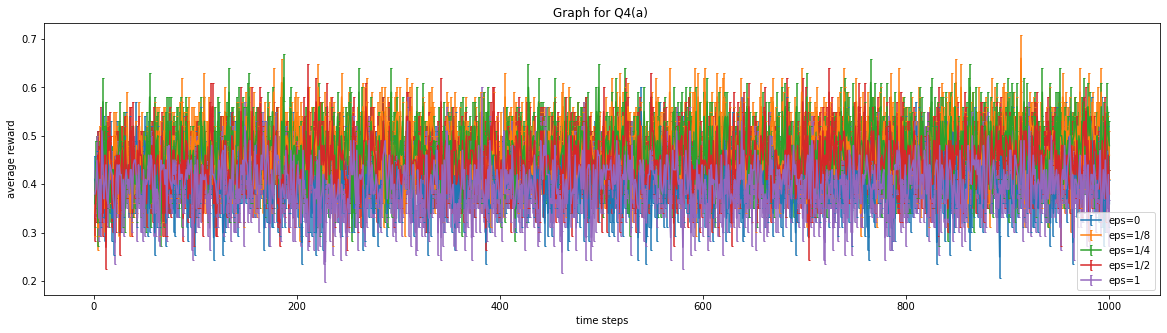

In [73]:
# plot Q4(a)
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.errorbar(x,avg_r_mean[0],yerr=avg_r_se[0],capsize=1,label="eps=0")  # blue
plt.errorbar(x,avg_r_mean[1],yerr=avg_r_se[1],capsize=1,label="eps=1/8")  # orange
plt.errorbar(x,avg_r_mean[2],yerr=avg_r_se[2],capsize=1,label="eps=1/4")  # green
plt.errorbar(x,avg_r_mean[3],yerr=avg_r_se[3],capsize=1,label="eps=1/2")  # red
plt.errorbar(x,avg_r_mean[4],yerr=avg_r_se[4],capsize=1,label="eps=1")  # purple
plt.title("Graph for Q4(a) ")
plt.xlabel("time steps")
plt.ylabel("average reward")
plt.legend(loc='lower right')
plt.show()

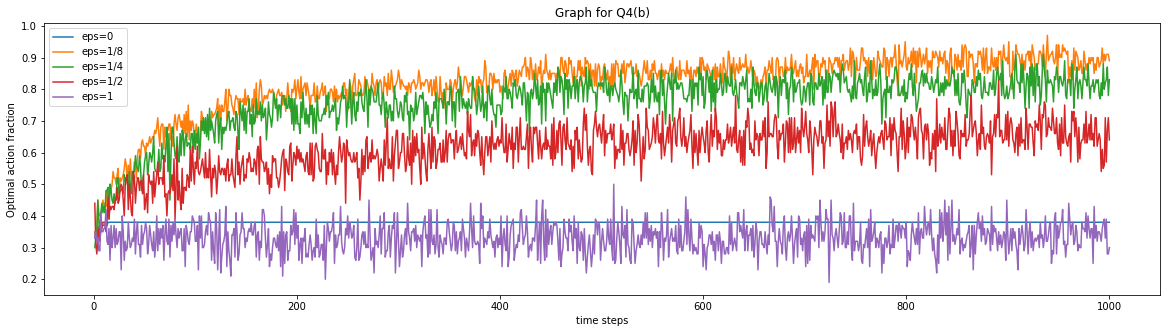

In [74]:
#plot Q4(b)
x=range(1, 1001)
plt.figure(figsize=(20,5))
plt.plot(x,opt_total_mean[0],label="eps=0")
plt.plot(x,opt_total_mean[1],label="eps=1/8")
plt.plot(x,opt_total_mean[2],label="eps=1/4")
plt.plot(x,opt_total_mean[3],label="eps=1/2")
plt.plot(x,opt_total_mean[4],label="eps=1")
plt.title("Graph for Q4(b)")
plt.xlabel("time steps")
plt.ylabel("Optimal action fraction")
plt.legend()
plt.show()

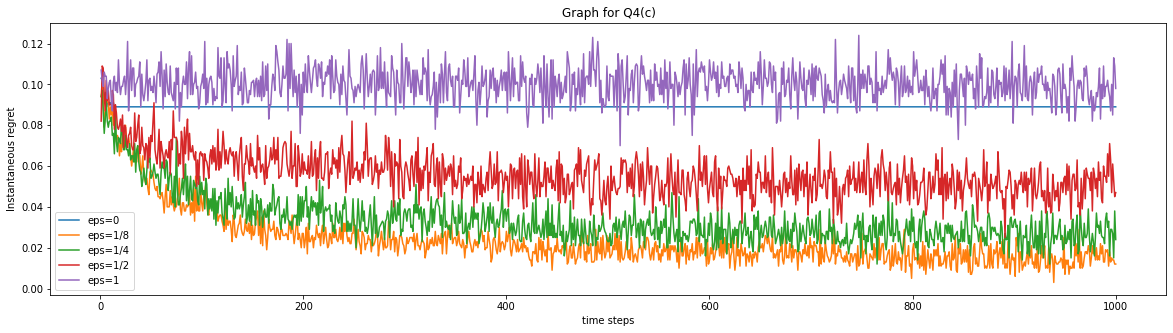

In [75]:
#plot Q4(c)
x=range(1, 1001)
plt.figure(figsize=(20,5))
plt.plot(x,regret_lt_mean[0],label="eps=0")
plt.plot(x,regret_lt_mean[1],label="eps=1/8")
plt.plot(x,regret_lt_mean[2],label="eps=1/4")
plt.plot(x,regret_lt_mean[3],label="eps=1/2")
plt.plot(x,regret_lt_mean[4],label="eps=1")
plt.title("Graph for Q4(c)")
plt.xlabel("time steps")
plt.ylabel("Instantaneous regret")
plt.legend()
plt.show()

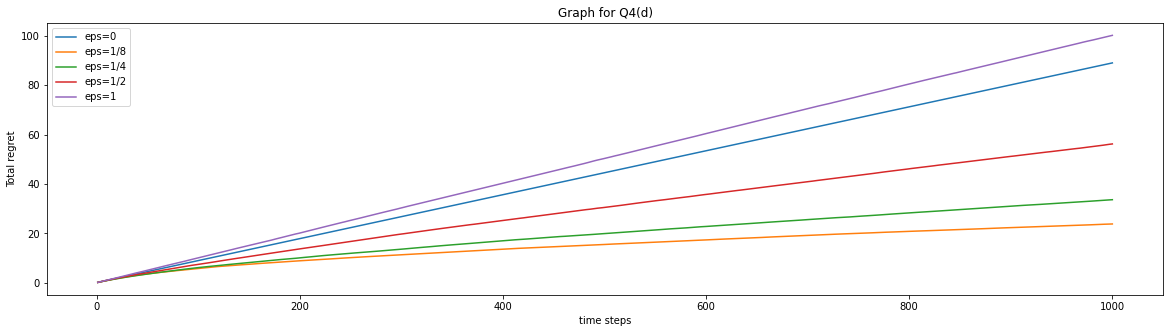

In [76]:
#plot Q4(d)
x=range(1, 1001)
plt.figure(figsize=(20,5))
plt.plot(x,total_regret_mean[0],label="eps=0")
plt.plot(x,total_regret_mean[1],label="eps=1/8")
plt.plot(x,total_regret_mean[2],label="eps=1/4")
plt.plot(x,total_regret_mean[3],label="eps=1/2")
plt.plot(x,total_regret_mean[4],label="eps=1")
plt.title("Graph for Q4(d)")
plt.xlabel("time steps")
plt.ylabel("Total regret")
plt.legend()
plt.show()

1. From the four graphs, we can see that in general the performances are ranked as follow: eps=`1/8`>`1/4`>`1/2`>`0`>`1`. 
2. For a), we can see that the errors are quite large for all epsilon. This is expected since we are averaging over 100 runs.
3. We can see b) and c) together. It's obvious that the higher the optimal action fraction, the more likely we are choosing a better arm and the less likely we regret. So the graph complementary trend as desired.
4. For c) and d) together, we can see that the instantaneous regrets fluctuate a lot but the trend is flat after t=200. So the total regret is almost linear after t=200 since its slope is the instantaneous regret.
5. Epsilon controls how likely we are going to explore in each step. \\
Eps=0 means that we always choose greedily so once we get a reward 1 in any arm, we will get trapped in that arm and it might not be the optimal one.\
Eps=1 means that we always explore, so the choices are completely random.\
Eps=1/8 means in each step, we have 1/8 probability to explore and similar for 1/4 and 1/2. The reason that 1/8 is better should be: when t increases, the agent is most likely to have found the best arm and it should thus always choose the optimal one. However, larger epsilon will enforce the agent to keep exploring and has a lower probability to choose the optimal arm. This tendency will lower the overall average rewards. 
6. A method to solve this is using decaying epsilon greedy algorithm. We will have more exploration at the beginning and as time goes by, we exploit our knowledge about which one could be the optimal and explore less.

In [77]:
# Q5
delta = 0.1
qval = [0.5, 0.5-delta, 0.5-2*delta]
epsilon = [1/8, 1/4]
alpha= [0.1, 0.01, 0.001, None]
avg_r = np.zeros((100,8,1000))
opt_total = np.zeros((100,8,1000))
regret_lt = np.zeros((100,8,1000))
#np.random.seed(2002)
for i in range(2):
    for k in range(4):
        np.random.seed(2002)
        for j in range(100):
            b = Bandits(3, qval)
            r, opt, lt = b.eps_greedy(epsilon[i], alpha= alpha[k])
            avg_r[j,4*i+ k] = np.array(r)
            opt_total[j,4*i+ k] = np.array(opt)
            regret_lt[j,4*i+ k] = np.array(lt)


avg_r_mean = np.mean(avg_r, axis=0)
avg_r_sd = np.std(avg_r, axis=0)
avg_r_se = avg_r_sd/math.sqrt(100)

opt_total_mean = np.mean(opt_total, axis=0)
regret_lt_mean = np.mean(regret_lt, axis=0)
total_regret = np.cumsum(regret_lt,axis=-1)
total_regret_mean = np.mean(total_regret, axis=0)


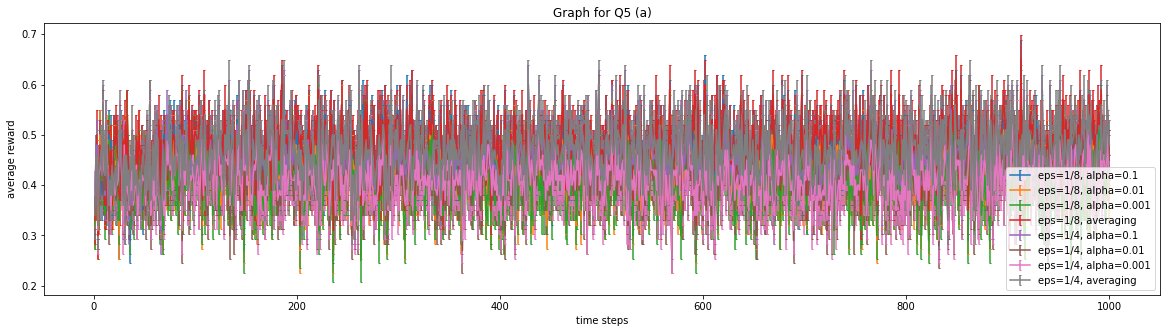

In [78]:
# plot Q5(a)
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.errorbar(x,avg_r_mean[0],yerr=avg_r_se[0],capsize=1,label="eps=1/8, alpha=0.1") 
plt.errorbar(x,avg_r_mean[1],yerr=avg_r_se[1],capsize=1,label="eps=1/8, alpha=0.01") 
plt.errorbar(x,avg_r_mean[2],yerr=avg_r_se[2],capsize=1,label="eps=1/8, alpha=0.001") 
plt.errorbar(x,avg_r_mean[3],yerr=avg_r_se[3],capsize=1,label="eps=1/8, averaging")  
plt.errorbar(x,avg_r_mean[4],yerr=avg_r_se[4],capsize=1,label="eps=1/4, alpha=0.1")  
plt.errorbar(x,avg_r_mean[5],yerr=avg_r_se[5],capsize=1,label="eps=1/4, alpha=0.01")
plt.errorbar(x,avg_r_mean[6],yerr=avg_r_se[6],capsize=1,label="eps=1/4, alpha=0.001")
plt.errorbar(x,avg_r_mean[7],yerr=avg_r_se[7],capsize=1,label="eps=1/4, averaging")
plt.title("Graph for Q5 (a)")
plt.xlabel("time steps")
plt.ylabel("average reward")
plt.legend(loc='lower right')
plt.show()

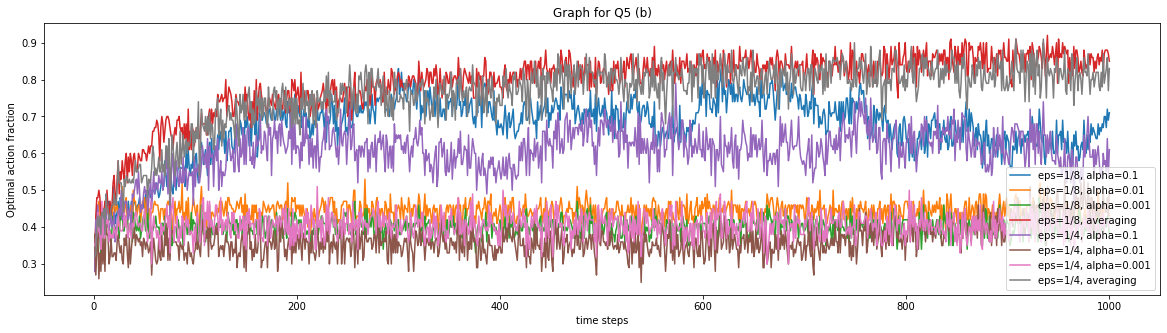

In [79]:
# plot Q5(b)
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.plot(x,opt_total_mean[0],label="eps=1/8, alpha=0.1") 
plt.plot(x,opt_total_mean[1],label="eps=1/8, alpha=0.01")  
plt.plot(x,opt_total_mean[2],label="eps=1/8, alpha=0.001")  
plt.plot(x,opt_total_mean[3],label="eps=1/8, averaging")  
plt.plot(x,opt_total_mean[4],label="eps=1/4, alpha=0.1")  
plt.plot(x,opt_total_mean[5],label="eps=1/4, alpha=0.01")
plt.plot(x,opt_total_mean[6],label="eps=1/4, alpha=0.001")
plt.plot(x,opt_total_mean[7],label="eps=1/4, averaging")
plt.title("Graph for Q5 (b)")
plt.xlabel("time steps")
plt.ylabel("Optimal action fraction")
plt.legend(loc='lower right')
plt.show()

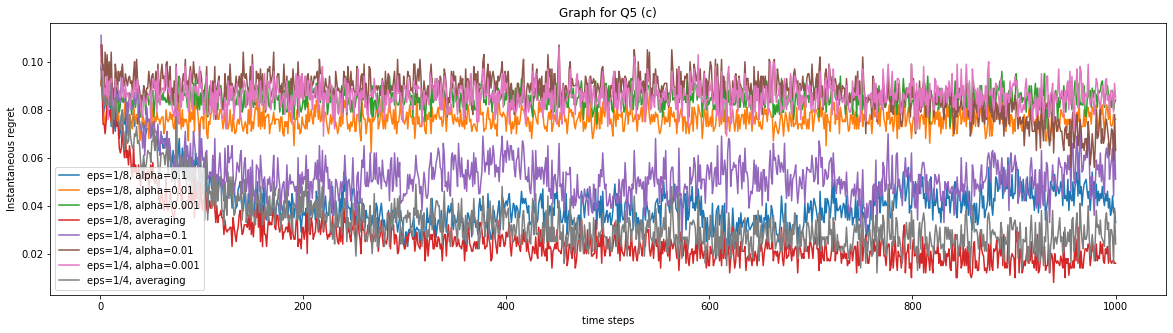

In [80]:
# plot Q5(c)
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.plot(x,regret_lt_mean[0],label="eps=1/8, alpha=0.1")  
plt.plot(x,regret_lt_mean[1],label="eps=1/8, alpha=0.01")  
plt.plot(x,regret_lt_mean[2],label="eps=1/8, alpha=0.001")  
plt.plot(x,regret_lt_mean[3],label="eps=1/8, averaging")  
plt.plot(x,regret_lt_mean[4],label="eps=1/4, alpha=0.1")  
plt.plot(x,regret_lt_mean[5],label="eps=1/4, alpha=0.01")
plt.plot(x,regret_lt_mean[6],label="eps=1/4, alpha=0.001")
plt.plot(x,regret_lt_mean[7],label="eps=1/4, averaging")
plt.title("Graph for Q5 (c)")
plt.xlabel("time steps")
plt.ylabel("Instantaneous regret")
plt.legend()
plt.show()


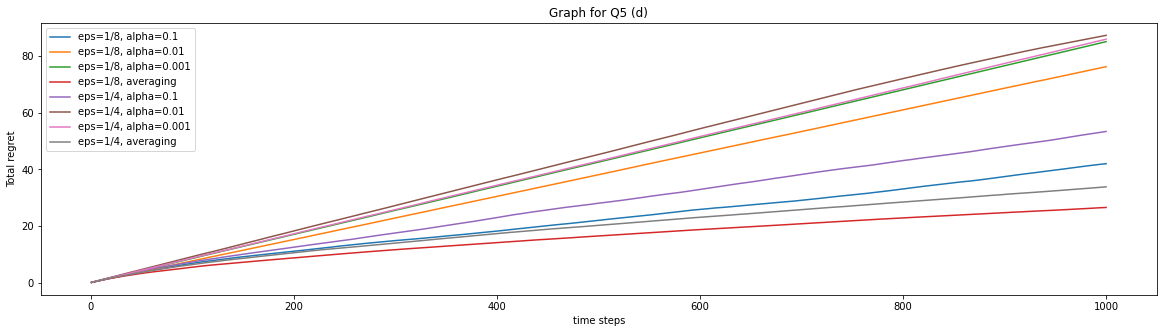

In [81]:
# plot Q5(d)
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.plot(x,total_regret_mean[0],label="eps=1/8, alpha=0.1")  
plt.plot(x,total_regret_mean[1],label="eps=1/8, alpha=0.01")  
plt.plot(x,total_regret_mean[2],label="eps=1/8, alpha=0.001")  
plt.plot(x,total_regret_mean[3],label="eps=1/8, averaging")  
plt.plot(x,total_regret_mean[4],label="eps=1/4, alpha=0.1")  
plt.plot(x,total_regret_mean[5],label="eps=1/4, alpha=0.01")
plt.plot(x,total_regret_mean[6],label="eps=1/4, alpha=0.001")
plt.plot(x,total_regret_mean[7],label="eps=1/4, averaging")
plt.title("Graph for Q5 (d)")
plt.xlabel("time steps")
plt.ylabel("Total regret")
plt.legend()
plt.show()

Q5: Algorithms with a smaller Epsilon and use averaging update methods tend to perform better than others. In this experimental setting, it is "eps=1/8, averaging" that performs the best. It has the highest average reward and the highest optimal action selection rate and the lowest Instantaneous regret and the lowest cumulative regret. Smaller epsilon encourages more exploitation but also balances exploration at a controlled scale. It prevents over exploration when the value estimation converges. Averaging update methods is a weight decaying method, which prevents the overall estimation overshoots and better guarantees the algorithm converge when it is confident enough about the highest value bandit. 

In [82]:
# Q6 UCB
delta = 0.1
qval = [0.5, 0.5-delta, 0.5-2*delta]
alpha= [0.1, 0.01, 0.001, None]
avg_r = np.zeros((100,4,1000))
opt_total = np.zeros((100,4,1000))
regret_lt = np.zeros((100,4,1000))
np.random.seed(2002)
for i in range(4):
  for j in range(100):
    b = Bandits(3, qval)
    r, opt, lt = b.ucb(2, alpha=alpha[i])
    avg_r[j,i] = np.array(r)
    opt_total[j,i] = np.array(opt)
    regret_lt[j,i] = np.array(lt)


avg_r_mean = np.mean(avg_r, axis=0)
avg_r_sd = np.std(avg_r, axis=0)
avg_r_se = avg_r_sd/math.sqrt(100)

opt_total_mean = np.mean(opt_total, axis=0)
regret_lt_mean = np.mean(regret_lt, axis=0)
total_regret = np.cumsum(regret_lt,axis=-1)
total_regret_mean = np.mean(total_regret, axis=0)

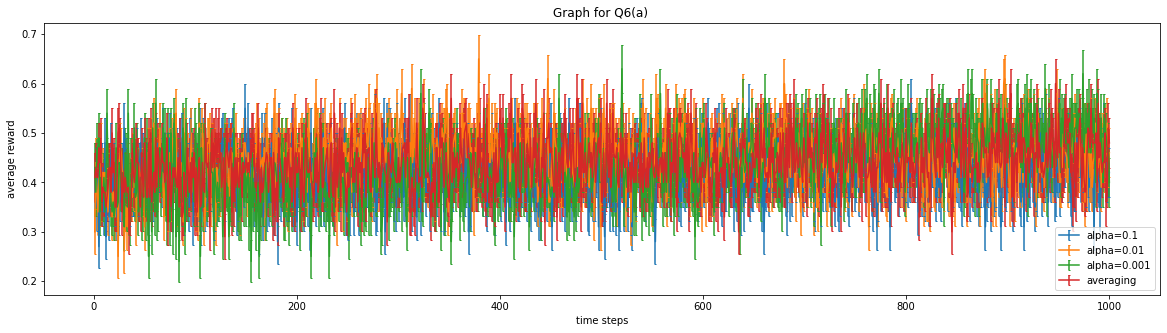

In [83]:
# plot Q6(a)
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.errorbar(x,avg_r_mean[0],yerr=avg_r_se[0],capsize=1,label="alpha=0.1") 
plt.errorbar(x,avg_r_mean[1],yerr=avg_r_se[1],capsize=1,label="alpha=0.01")  
plt.errorbar(x,avg_r_mean[2],yerr=avg_r_se[2],capsize=1,label="alpha=0.001") 
plt.errorbar(x,avg_r_mean[3],yerr=avg_r_se[3],capsize=1,label="averaging")  

plt.title("Graph for Q6(a) ")
plt.xlabel("time steps")
plt.ylabel("average reward")
plt.legend(loc='lower right')
plt.show()

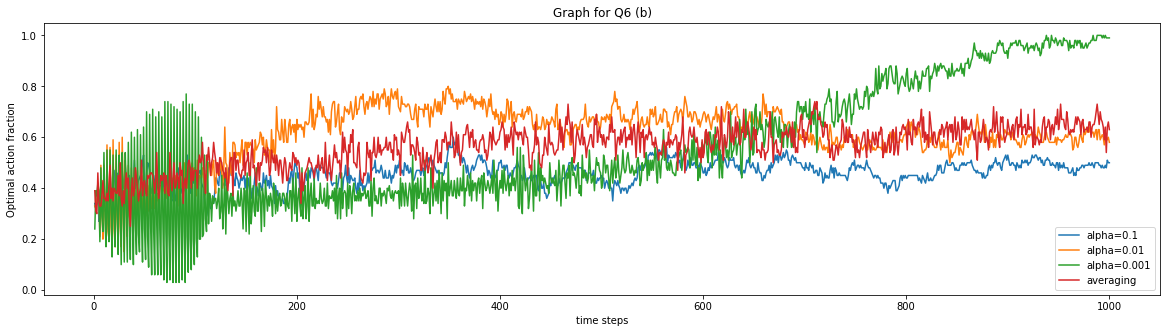

In [84]:
# plot Q6(b)
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.plot(x,opt_total_mean[0],label="alpha=0.1") 
plt.plot(x,opt_total_mean[1],label="alpha=0.01")  
plt.plot(x,opt_total_mean[2],label="alpha=0.001")  
plt.plot(x,opt_total_mean[3],label="averaging")   
plt.title("Graph for Q6 (b)")
plt.xlabel("time steps")
plt.ylabel("Optimal action fraction")
plt.legend(loc='lower right')
plt.show()

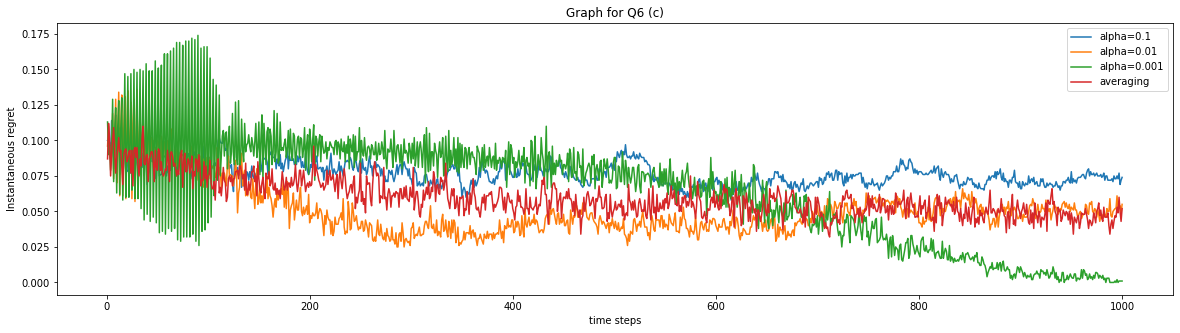

In [85]:
# plot Q6(c)
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.plot(x,regret_lt_mean[0],label="alpha=0.1")  
plt.plot(x,regret_lt_mean[1],label="alpha=0.01")  
plt.plot(x,regret_lt_mean[2],label="alpha=0.001")  
plt.plot(x,regret_lt_mean[3],label="averaging") 
plt.title("Graph for Q6 (c)")
plt.xlabel("time steps")
plt.ylabel("Instantaneous regret")
plt.legend()
plt.show()

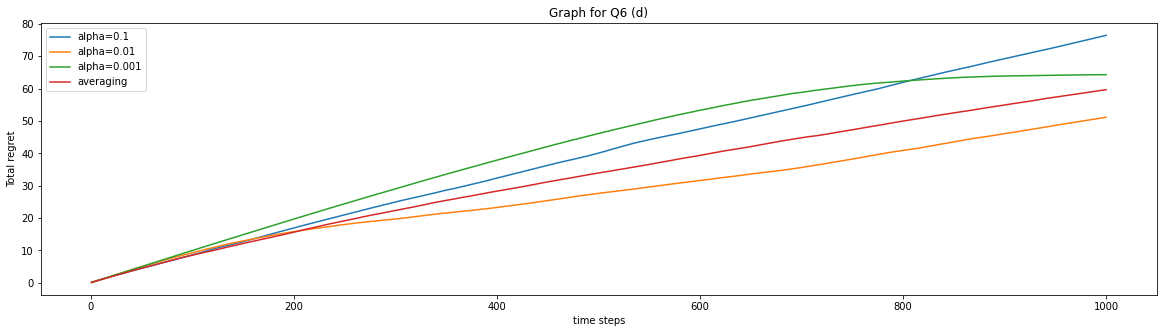

In [86]:
# plot Q6(d)
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.plot(x,total_regret_mean[0],label="alpha=0.1")  
plt.plot(x,total_regret_mean[1],label="alpha=0.01")  
plt.plot(x,total_regret_mean[2],label="alpha=0.001")  
plt.plot(x,total_regret_mean[3],label="averaging")  
plt.title("Graph for Q6 (d)")
plt.xlabel("time steps")
plt.ylabel("Total regret")
plt.legend()
plt.show()

Q6: Surprisingly, for the UCB method, the 0.001 alpha update performs the best among the given ones but not the Averaging method. The 0.001 alpha update method has worse performance than the others at the earlier time steps but suprpasses others in the later steps. A small learning rate at the beginning encourages more exploration thus causing big and rapid fluctuations in performances. But when it has become confident enough by early steps of explorations, it will stick more to the estimated optimal action. The small learning rate guarantees that the estimates will not change dramatically so that it could more likely to pick the highest estimated arm. The averaging method initially had a big learning rate, which is likely to have a big error in its estimate update. Even if the learning rate is gradually decaying over the period, it still suffers the error in estimate from the early steps and tend to choose actions that are suboptimal. Afterall, the averaging update method has a bigger learning rate higher than the 0.001 alpha in this experiment setting which does harm to its performance. 

In [87]:
# Q7 Thompson sampling
delta = 0.1
qval = [0.5, 0.5-delta, 0.5-2*delta]

avg_r = np.zeros((100, 1000))
opt_total = np.zeros((100,1000))
regret_lt = np.zeros((100,1000))
np.random.seed(2002)
for i in range(100):
    b = Bandits(3, qval)
    r, opt, lt = b.thompson()
    avg_r[i] = np.array(r)
    opt_total[i] = np.array(opt)
    regret_lt[i] = np.array(lt)


avg_r_mean = np.mean(avg_r, axis=0)
avg_r_sd = np.std(avg_r, axis=0)
avg_r_se = avg_r_sd/math.sqrt(100)

opt_total_mean = np.mean(opt_total, axis=0)
regret_lt_mean = np.mean(regret_lt, axis=0)
total_regret = np.cumsum(regret_lt,axis=-1)
total_regret_mean = np.mean(total_regret, axis=0)

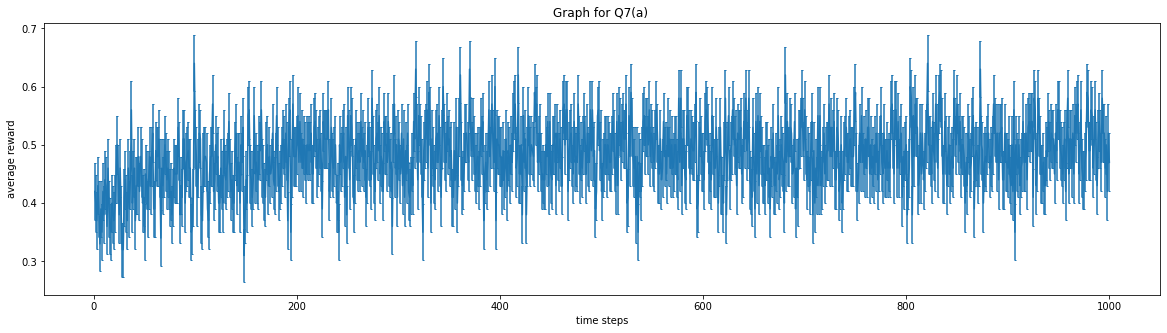

In [88]:
# plot Q7(a)
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.errorbar(x,avg_r_mean,yerr=avg_r_se,capsize=1) 

plt.title("Graph for Q7(a) ")
plt.xlabel("time steps")
plt.ylabel("average reward")

plt.show()

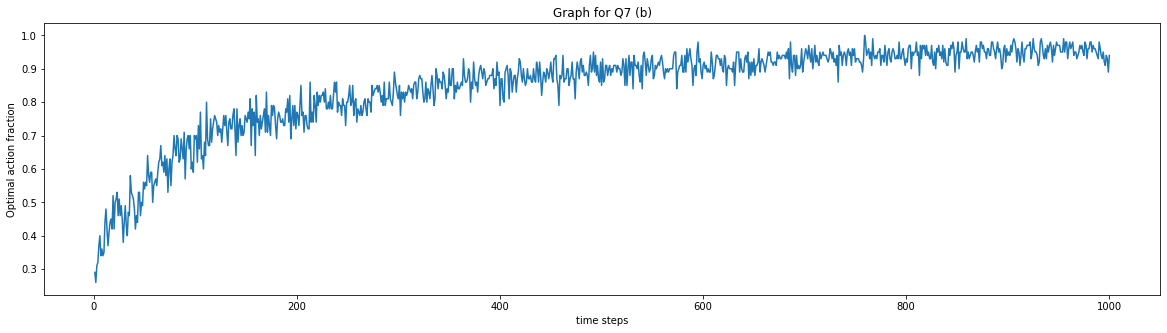

In [89]:
# plot Q7(b)
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.plot(x,opt_total_mean) 

plt.title("Graph for Q7 (b)")
plt.xlabel("time steps")
plt.ylabel("Optimal action fraction")

plt.show()

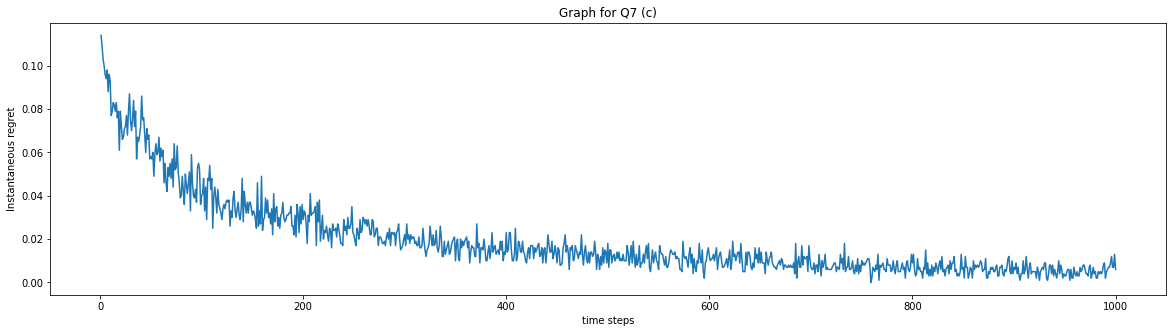

In [90]:
# plot Q7(c)
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.plot(x,regret_lt_mean)  

plt.title("Graph for Q7 (c)")
plt.xlabel("time steps")
plt.ylabel("Instantaneous regret")

plt.show()

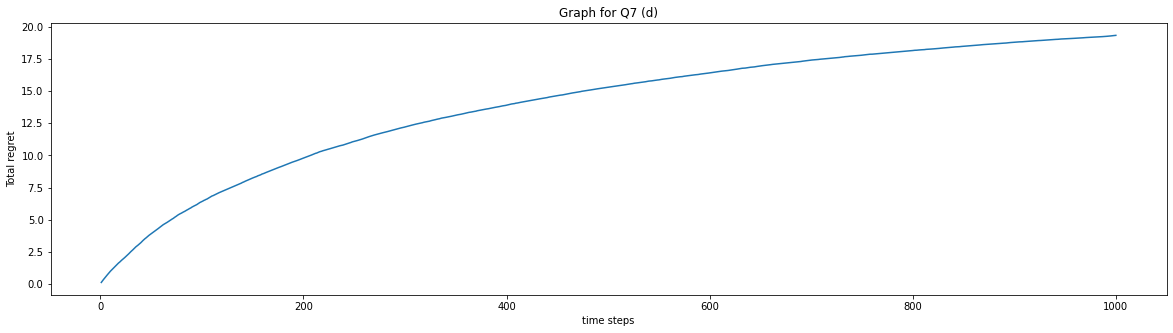

In [91]:
# plot Q7(d)
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.plot(x,total_regret_mean)  

plt.title("Graph for Q7 (d)")
plt.xlabel("time steps")
plt.ylabel("Total regret")

plt.show()

Q7: The Thompson sampling performs really well in this setting. It shows a rather fast convergence speed. It nearly converges for only 1000 time steps based on the observations from the graph. It has a high optimal action selection rate and a sub-linear total regret rate. This is because Thompson sampling has the ability to exploit the optimal action. More positive feedbacks from the optimal action means the corresponding beta distribution is more right skewed than others. While the worst actions are more left skewed because few rewards are coming out of them. This moving trends will enable the algorithm to exploit more on the optimal actions while maintain the exploration on the currently sub-optimal/bad ones.

In [92]:
# Q8
delta = 0.1
qval = [0.5, 0.5-delta, 0.5-2*delta]
avg_r=np.zeros((100,1000))
opt_total=np.zeros((100,1000))
regret_lt=np.zeros((100,1000))
avg_r_mean=np.zeros((3,1000))
avg_r_se=np.zeros((3,1000))
opt_total_mean=np.zeros((3,1000))
regret_lt_mean=np.zeros((3,1000))
total_regret_mean=np.zeros((3,1000))
# epsilon greedy algorithm: epsilon=1/8+averaging
np.random.seed(2002)
for i in range(100):
    b = Bandits(3, qval)
    r, opt, lt = b.eps_greedy(1/8)
    avg_r[i] = np.array(r)
    opt_total[i] = np.array(opt)
    regret_lt[i] = np.array(lt)


avg_r_mean[0]= np.mean(avg_r, axis=0)
avg_r_sd = np.std(avg_r, axis=0)
avg_r_se[0] = avg_r_sd/math.sqrt(100)

opt_total_mean[0] = np.mean(opt_total, axis=0)
regret_lt_mean[0] = np.mean(regret_lt, axis=0)
total_regret = np.cumsum(regret_lt,axis=-1)
total_regret_mean[0] = np.mean(total_regret, axis=0)

# UCB: alpha=0.001
np.random.seed(2002)
for i in range(100):
    b = Bandits(3, qval)
    r, opt, lt = b.ucb(2,alpha=0.001)
    avg_r[i] = np.array(r)
    opt_total[i] = np.array(opt)
    regret_lt[i] = np.array(lt)


avg_r_mean[1]= np.mean(avg_r, axis=0)
avg_r_sd = np.std(avg_r, axis=0)
avg_r_se[1] = avg_r_sd/math.sqrt(100)

opt_total_mean[1] = np.mean(opt_total, axis=0)
regret_lt_mean[1] = np.mean(regret_lt, axis=0)
total_regret = np.cumsum(regret_lt,axis=-1)
total_regret_mean[1] = np.mean(total_regret, axis=0)

# TS: general
np.random.seed(2002)
for i in range(100):
    b = Bandits(3, qval)
    r, opt, lt = b.thompson()
    avg_r[i] = np.array(r)
    opt_total[i] = np.array(opt)
    regret_lt[i] = np.array(lt)


avg_r_mean[2]= np.mean(avg_r, axis=0)
avg_r_sd = np.std(avg_r, axis=0)
avg_r_se[2] = avg_r_sd/math.sqrt(100)

opt_total_mean[2] = np.mean(opt_total, axis=0)
regret_lt_mean[2] = np.mean(regret_lt, axis=0)
total_regret = np.cumsum(regret_lt,axis=-1)
total_regret_mean[2] = np.mean(total_regret, axis=0)

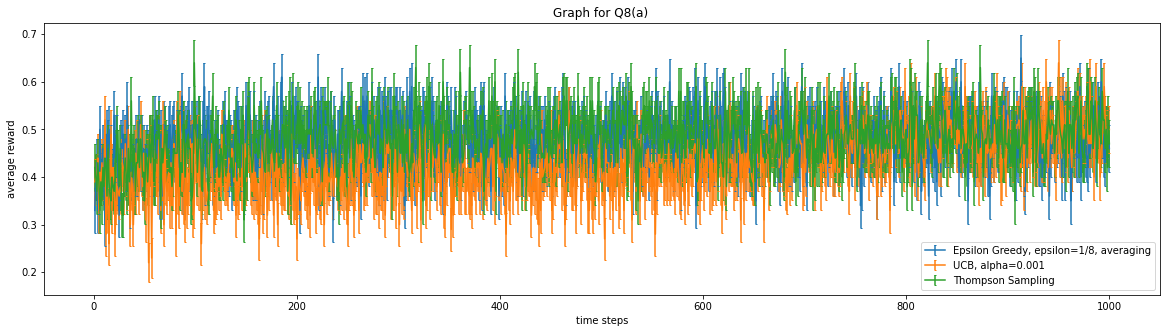

In [93]:
# plot Q8(a)
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.errorbar(x,avg_r_mean[0],yerr=avg_r_se[0],capsize=1,label="Epsilon Greedy, epsilon=1/8, averaging") 
plt.errorbar(x,avg_r_mean[1],yerr=avg_r_se[1],capsize=1,label="UCB, alpha=0.001")  
plt.errorbar(x,avg_r_mean[2],yerr=avg_r_se[2],capsize=1,label="Thompson Sampling") 

plt.title("Graph for Q8(a) ")
plt.xlabel("time steps")
plt.ylabel("average reward")
plt.legend(loc='lower right')
plt.show()

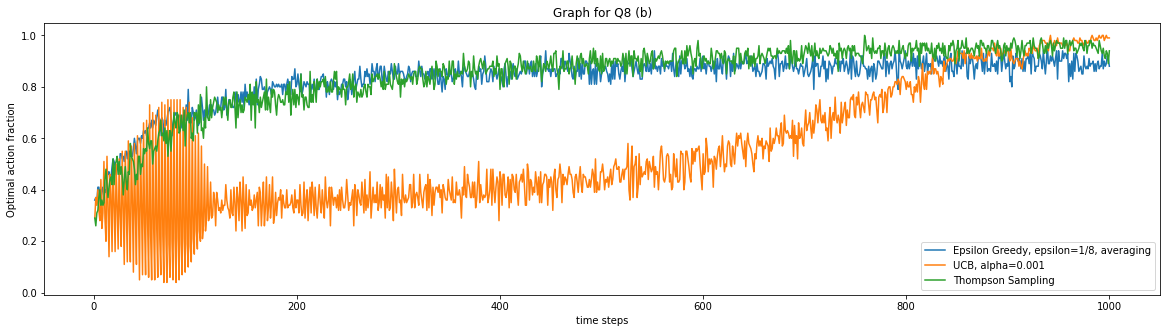

In [94]:
# plot Q8(b)
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.plot(x,opt_total_mean[0],label="Epsilon Greedy, epsilon=1/8, averaging") 
plt.plot(x,opt_total_mean[1],label="UCB, alpha=0.001")  
plt.plot(x,opt_total_mean[2],label="Thompson Sampling")     
plt.title("Graph for Q8 (b)")
plt.xlabel("time steps")
plt.ylabel("Optimal action fraction")
plt.legend(loc='lower right')
plt.show()

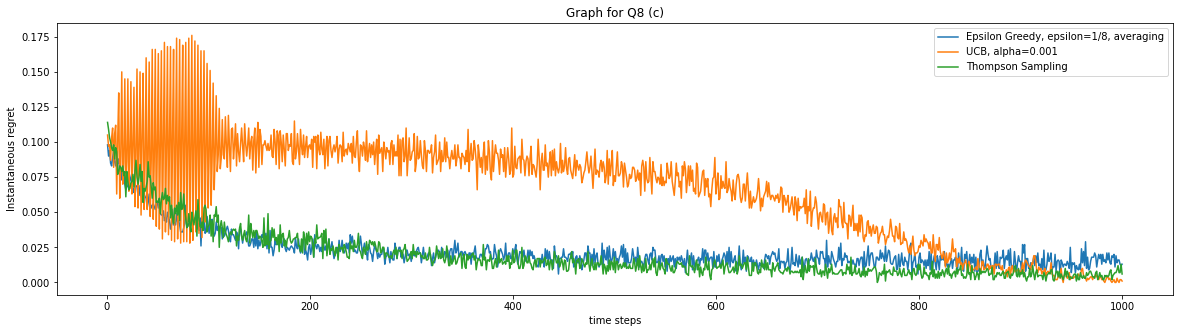

In [95]:
# plot Q8(c)
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.plot(x,regret_lt_mean[0],label="Epsilon Greedy, epsilon=1/8, averaging")  
plt.plot(x,regret_lt_mean[1],label="UCB, alpha=0.001")  
plt.plot(x,regret_lt_mean[2],label="Thompson Sampling")  
plt.title("Graph for Q8 (c)")
plt.xlabel("time steps")
plt.ylabel("Instantaneous regret")
plt.legend()
plt.show()

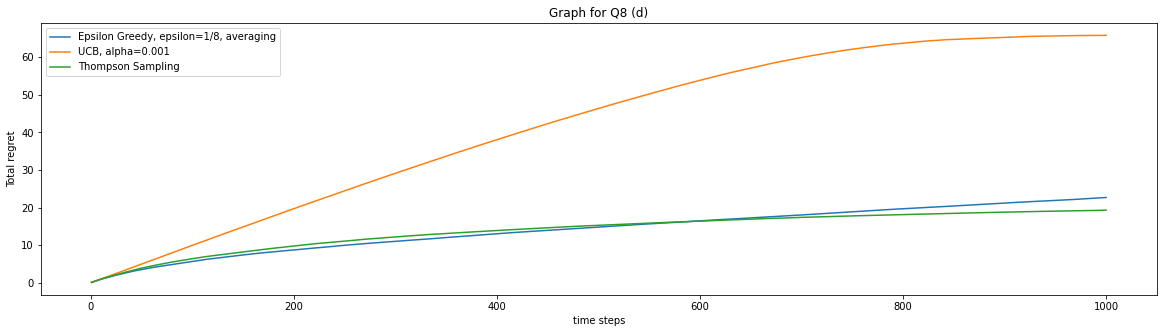

In [96]:
# plot Q8(d)
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.plot(x,total_regret_mean[0],label="Epsilon Greedy, epsilon=1/8, averaging")  
plt.plot(x,total_regret_mean[1],label="UCB, alpha=0.001")  
plt.plot(x,total_regret_mean[2],label="Thompson Sampling")  
plt.title("Graph for Q8 (d)")
plt.xlabel("time steps")
plt.ylabel("Total regret")
plt.legend()
plt.show()

Q8: In all the algorithms, we picked the best hyper-parameter combination based on the overall performance in four categories (received reward, optimal action rate, Instantaneous regret, total regret). We mainly focus on total regret. A lower total regret means it sticks more the optimal action, which indicates a high received reward, high optimal action selection rate and a lower instantenous regret. It can also reflect the overall trend of the algorithm in selecting actions. But we also take other measurements into consideration. In epsilon algorithms, we picked the pair of "epsilon=1/8, averaging update". It has the highest average reward and optimal action selection rate over the time. It also has the lowest instantenous regret and the total regret among all the epsilon algorithms as observed from the plots. In the UCB group, we picked "alpha=0.001" one. Although it does not perform as well as others in the beginning, (it has a higher total regret, higer instantenous regret and lower optimal action selection rate and lower reward rate) it surpasses others in the end. It has the highest optimal action selection rate and the lowest instantenous regret at 1000 time step. It does have a higher total regret than some combinations at 1000 time step, but it shows an obvious sub-linear total regret moving trend, where others are all linear-like total regret increases with higher slopes. This indicates it will outperform others if given more time steps. \\
Among the three selected methods, Epsilon greedy and Thompson sampling performs better than UCB. They have lower total regret and lower instantenous regret but higher optimal action selection rate. But UCB performs better at the end of the steps and surpass the other two in optimal action selection rate and average reward. It also has lower instanteous regret. UCB takes time to converge to the optimal action and more sticks to it. Although UCB has higher total regret than the others, it was mainly due to the explorative regret cumulated from the early steps. Notably, Thompson sampling performs better than epsilon greedy in the end. Like UCB, Thompson sampling explores more in the early steps. So it has a higher total regret than epsilon greedy in the early steps. But later on, when it converges, it selects the optimal action more than the epsilon greedy and thus has a lower total regret than the epsilon greedy method in the end.

In [97]:
# Q9
delta = 0.1
qval = [0.5, 0.5-delta, 0.5-2*delta]
new_qval = [0.5, 0.5+delta, 0.5+2*delta]
eps = [1/4, 1/8]
avg_r = np.zeros((100,7, 1000))
opt_total = np.zeros((100,7, 1000))
regret_lt = np.zeros((100,7, 1000))
np.random.seed(2002)


# Epsilon alpha
for i in [0, 1]:
  for j in range(100):
    b = Bandits(3, qval)
    r, opt, lt = b.eps_greedy(eps[i], alpha=0.1, new_bandit= new_qval, tSteps= 1000)
    avg_r[j,i] = np.array(r)
    opt_total[j,i] = np.array(opt)
    regret_lt[j,i] = np.array(lt)

# Epsilon average
for i in [2, 3]:
  for j in range(100):
    b = Bandits(3, qval)
    r, opt, lt = b.eps_greedy(eps[i- 2], alpha= None, new_bandit= new_qval, tSteps= 1000)
    avg_r[j,i] = np.array(r)
    opt_total[j,i] = np.array(opt)
    regret_lt[j,i] = np.array(lt)

# UCB alpha= 0.1
for j in range(100):
    b = Bandits(3, qval)
    r, opt, lt = b.ucb(2, alpha=0.1, new_bandit= new_qval, tSteps= 1000)
    avg_r[j, 4] = np.array(r)
    opt_total[j, 4] = np.array(opt)
    regret_lt[j, 4] = np.array(lt)

# UCB average
for j in range(100):
    b = Bandits(3, qval)
    r, opt, lt = b.ucb(2, alpha=None, new_bandit= new_qval, tSteps= 1000)
    avg_r[j, 5] = np.array(r)
    opt_total[j, 5] = np.array(opt)
    regret_lt[j, 5] = np.array(lt)

# Thompson 
for j in range(100):
    b = Bandits(3, qval)
    r, opt, lt = b.thompson(new_bandit= new_qval, tSteps= 1000)
    avg_r[j, 6] = np.array(r)
    opt_total[j, 6] = np.array(opt)
    regret_lt[j, 6] = np.array(lt)



avg_r_mean = np.mean(avg_r, axis=0)
avg_r_sd = np.std(avg_r, axis=0)
avg_r_se = avg_r_sd/math.sqrt(100)

opt_total_mean = np.mean(opt_total, axis=0)
regret_lt_mean = np.mean(regret_lt, axis=0)
total_regret = np.cumsum(regret_lt,axis=-1)
total_regret_mean = np.mean(total_regret, axis=0)

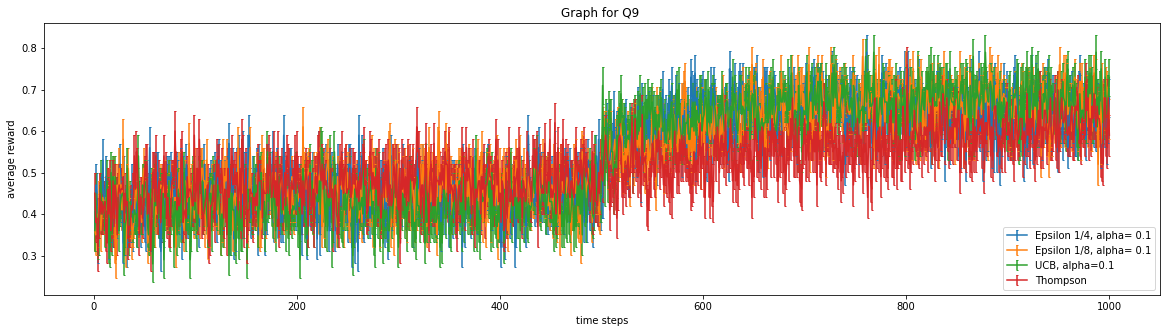

In [98]:
# plot Q9
# Alpha update methods and TS
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.errorbar(x,avg_r_mean[0],yerr=avg_r_se[0],capsize=1,label="Epsilon 1/4, alpha= 0.1") 
plt.errorbar(x,avg_r_mean[1],yerr=avg_r_se[1],capsize=1,label="Epsilon 1/8, alpha= 0.1")  
plt.errorbar(x,avg_r_mean[4],yerr=avg_r_se[4],capsize=1,label="UCB, alpha=0.1") 
plt.errorbar(x,avg_r_mean[6],yerr=avg_r_se[6],capsize=1,label="Thompson") 
 

plt.title("Graph for Q9 ")
plt.xlabel("time steps")
plt.ylabel("average reward")
plt.legend(loc='lower right')
plt.show()

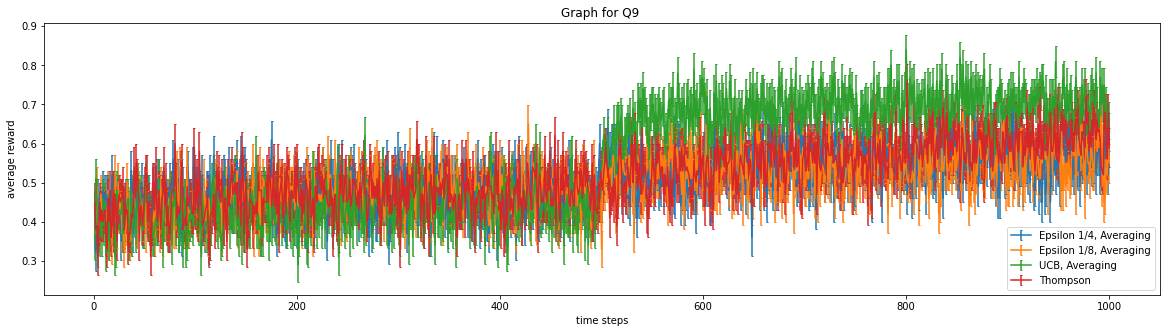

In [99]:
# plot Q9
# Averaging update methods and TS
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.errorbar(x,avg_r_mean[2],yerr=avg_r_se[2],capsize=1,label="Epsilon 1/4, Averaging") 
plt.errorbar(x,avg_r_mean[3],yerr=avg_r_se[3],capsize=1,label="Epsilon 1/8, Averaging")
plt.errorbar(x,avg_r_mean[5],yerr=avg_r_se[5],capsize=1,label="UCB, Averaging")
plt.errorbar(x,avg_r_mean[6],yerr=avg_r_se[6],capsize=1,label="Thompson") 

plt.title("Graph for Q9 ")
plt.xlabel("time steps")
plt.ylabel("average reward")
plt.legend(loc='lower right')
plt.show()

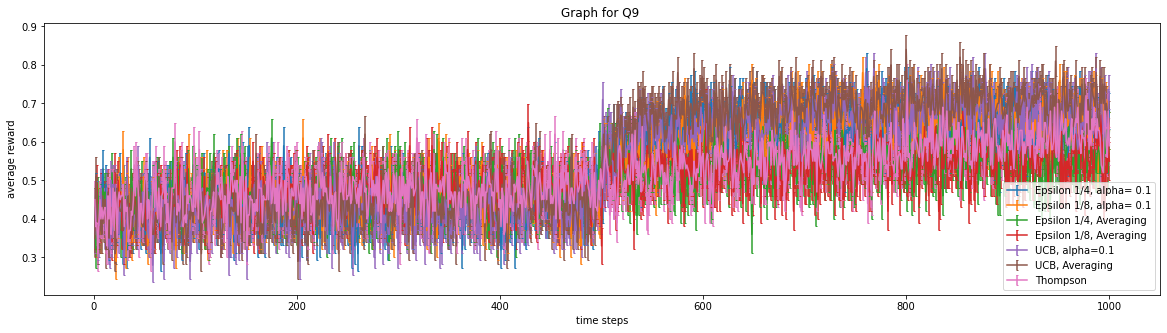

In [100]:
# plot Q9
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.errorbar(x,avg_r_mean[0],yerr=avg_r_se[0],capsize=1,label="Epsilon 1/4, alpha= 0.1") 
plt.errorbar(x,avg_r_mean[1],yerr=avg_r_se[1],capsize=1,label="Epsilon 1/8, alpha= 0.1")
plt.errorbar(x,avg_r_mean[2],yerr=avg_r_se[2],capsize=1,label="Epsilon 1/4, Averaging") 
plt.errorbar(x,avg_r_mean[3],yerr=avg_r_se[3],capsize=1,label="Epsilon 1/8, Averaging")  
plt.errorbar(x,avg_r_mean[4],yerr=avg_r_se[4],capsize=1,label="UCB, alpha=0.1") 
plt.errorbar(x,avg_r_mean[5],yerr=avg_r_se[5],capsize=1,label="UCB, Averaging")
plt.errorbar(x,avg_r_mean[6],yerr=avg_r_se[6],capsize=1,label="Thompson") 

plt.title("Graph for Q9 ")
plt.xlabel("time steps")
plt.ylabel("average reward")
plt.legend(loc='lower right')
plt.show()

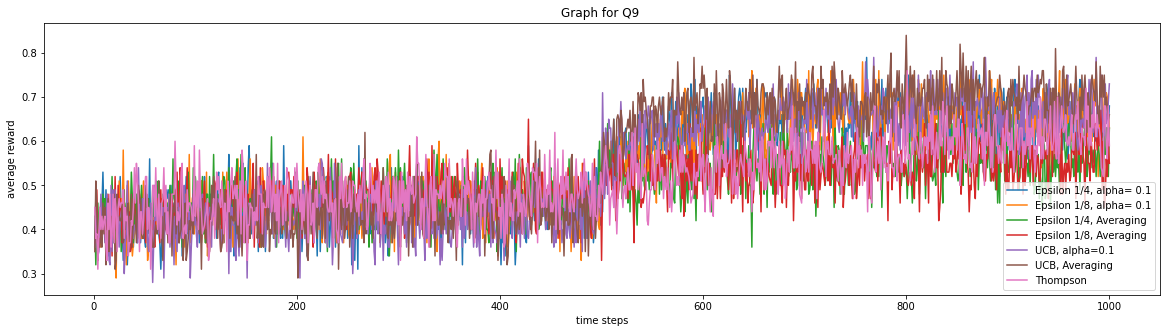

In [101]:
# plot Q9
# A plot without error bars
x = range(1, 1001)
plt.figure(figsize=(20,5))
plt.plot(x,avg_r_mean[0],label="Epsilon 1/4, alpha= 0.1") 
plt.plot(x,avg_r_mean[1],label="Epsilon 1/8, alpha= 0.1")
plt.plot(x,avg_r_mean[2],label="Epsilon 1/4, Averaging") 
plt.plot(x,avg_r_mean[3],label="Epsilon 1/8, Averaging")  
plt.plot(x,avg_r_mean[4],label="UCB, alpha=0.1") 
plt.plot(x,avg_r_mean[5],label="UCB, Averaging")
plt.plot(x,avg_r_mean[6],label="Thompson") 

plt.title("Graph for Q9 ")
plt.xlabel("time steps")
plt.ylabel("average reward")
plt.legend(loc='lower right')
plt.show()

Q9: Based on our experiments, we found that UCB with averaging value estimation has the highest reward in the end for this non-stationary environment. Thompson sampling in this non-stationary setting is not performing very well in the end. It's reward does not have a immediate noticeably increase compared with other methods. This is mainly due to the Bayesian nature of Thompson sampling. It does not depend on the estimation value to choose the action but rather by updating the prior distribution. In this case, even if it starts to shift its focus to the new optimal action, it would still assign a rather high probability to the previous optimal action. This will in turn prevent the algorithm from exploiting the new optimal action. For UCB, it has first tried many times on the previous optimal action. Once the environment has changed, its exploration nature will drive it to try these new optimal actions that were not chosen a lot previously. Then it can quickly shift its focus to these actions. Our explanation is supported by the stats from 0-500 steps . In this pre-changing period, Thompson sampling performs better than UCB, which indicates that it has exploited the environment more. After the value transition, it is hard for it to erase all the previous memory. So, it performs worse. For Epsilon methods, they always have the ability to explore the environment, so it is easy for them to quickly find out the new optimal actions. But they do not perform as well as the UCB method in that they do not stick to optimal actions even if they have fully explored environments. 


